In [104]:
import sys
ABS_ROOT_DIR_PATH = '/host/dissertation/'
if ABS_ROOT_DIR_PATH not in sys.path:
    sys.path.append(ABS_ROOT_DIR_PATH)

In [105]:
import tensorflow as tf
print(tf.config.list_physical_devices())

POINTS_NUM = 10

import numpy as np
points = np.load(f'/host/dissertation/proccessed_data/points_{POINTS_NUM}.npy')
phi = np.load('/host/dissertation/proccessed_data/phi.npy')
pt = np.load('/host/dissertation/proccessed_data/pt.npy')
q = np.load('/host/dissertation/proccessed_data/q.npy')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [106]:
import cvnn.layers as complex_layers
from cvnn.losses import ComplexMeanSquareError
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import Loss


def get_model(verbose = False):
        model = tf.keras.models.Sequential()
        model.add(complex_layers.ComplexInput(input_shape=(POINTS_NUM,)))
        model.add(complex_layers.ComplexDense(units=128, activation='pol_tanh'))
        model.add(complex_layers.ComplexDense(units=128, activation='pol_tanh'))
        model.add(complex_layers.ComplexDense(units=1, activation=activation_phase))
        model.compile(loss=AngleError(), optimizer=SGD(clipnorm=1.))
        if verbose:
                model.summary()
        return model

model = get_model(True)

NameError: name 'activation_phase' is not defined

In [ ]:
history = model.fit(points, phi, epochs=25, validation_split=0.2, verbose=0, callbacks=[FreeMemory(25)])

In [ ]:
model.predict(points[:5])

In [107]:
model = tf.keras.models.Sequential()
model.add(complex_layers.ComplexInput(input_shape=(POINTS_NUM,)))
model.add(complex_layers.ComplexDense(units=16, activation='pol_sigmoid'))
model.add(complex_layers.ComplexDense(units=16, activation='pol_sigmoid'))
model.add(complex_layers.ComplexDense(units=16, activation='pol_sigmoid'))
model.add(complex_layers.ComplexDense(units=1, activation='convert_to_real_with_abs'))
model.compile(optimizer=tf.keras.optimizers.SGD(clipnorm=1.), loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])
model.summary(expand_nested=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_dense_2 (ComplexDe  (None, 16)                352       
 nse)                                                            
                                                                 
 complex_dense_3 (ComplexDe  (None, 16)                544       
 nse)                                                            
                                                                 
 complex_dense_4 (ComplexDe  (None, 16)                544       
 nse)                                                            
                                                                 
 complex_dense_5 (ComplexDe  (None, 1)                 34        
 nse)                                                            
                                                                 
Total params: 1474 (5.76 KB)
Trainable params: 1474 (5

In [146]:
model.load_weights('/host/dissertation/trained_models/pt_exxample_3x16-sigmoid_weights.h5')
estimated_pt = model.predict(points)

205/256 [=======================>......] - ETA: 0s

256/256 [==============================] - 0s 488us/step


(array([[0.10879878, 0.1158378 , 0.1089518 , 0.11017598, 0.11430757,
        0.11369549, 0.11109411, 0.1075746 , 0.10956389],
       [0.11015912, 0.11933905, 0.11689106, 0.11321909, 0.11627907,
        0.11077111, 0.09547124, 0.11505508, 0.10281518],
       [0.08841136, 0.12924021, 0.11450499, 0.0953185 , 0.1771297 ,
        0.15303147, 0.14750576, 0.09409056, 0.00076746],
       [0.09090909, 0.13329238, 0.11793612, 0.09090909, 0.18550369,
        0.12837838, 0.1517199 , 0.0995086 , 0.00184275]]), array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), <a list of 4 BarContainer objects>)


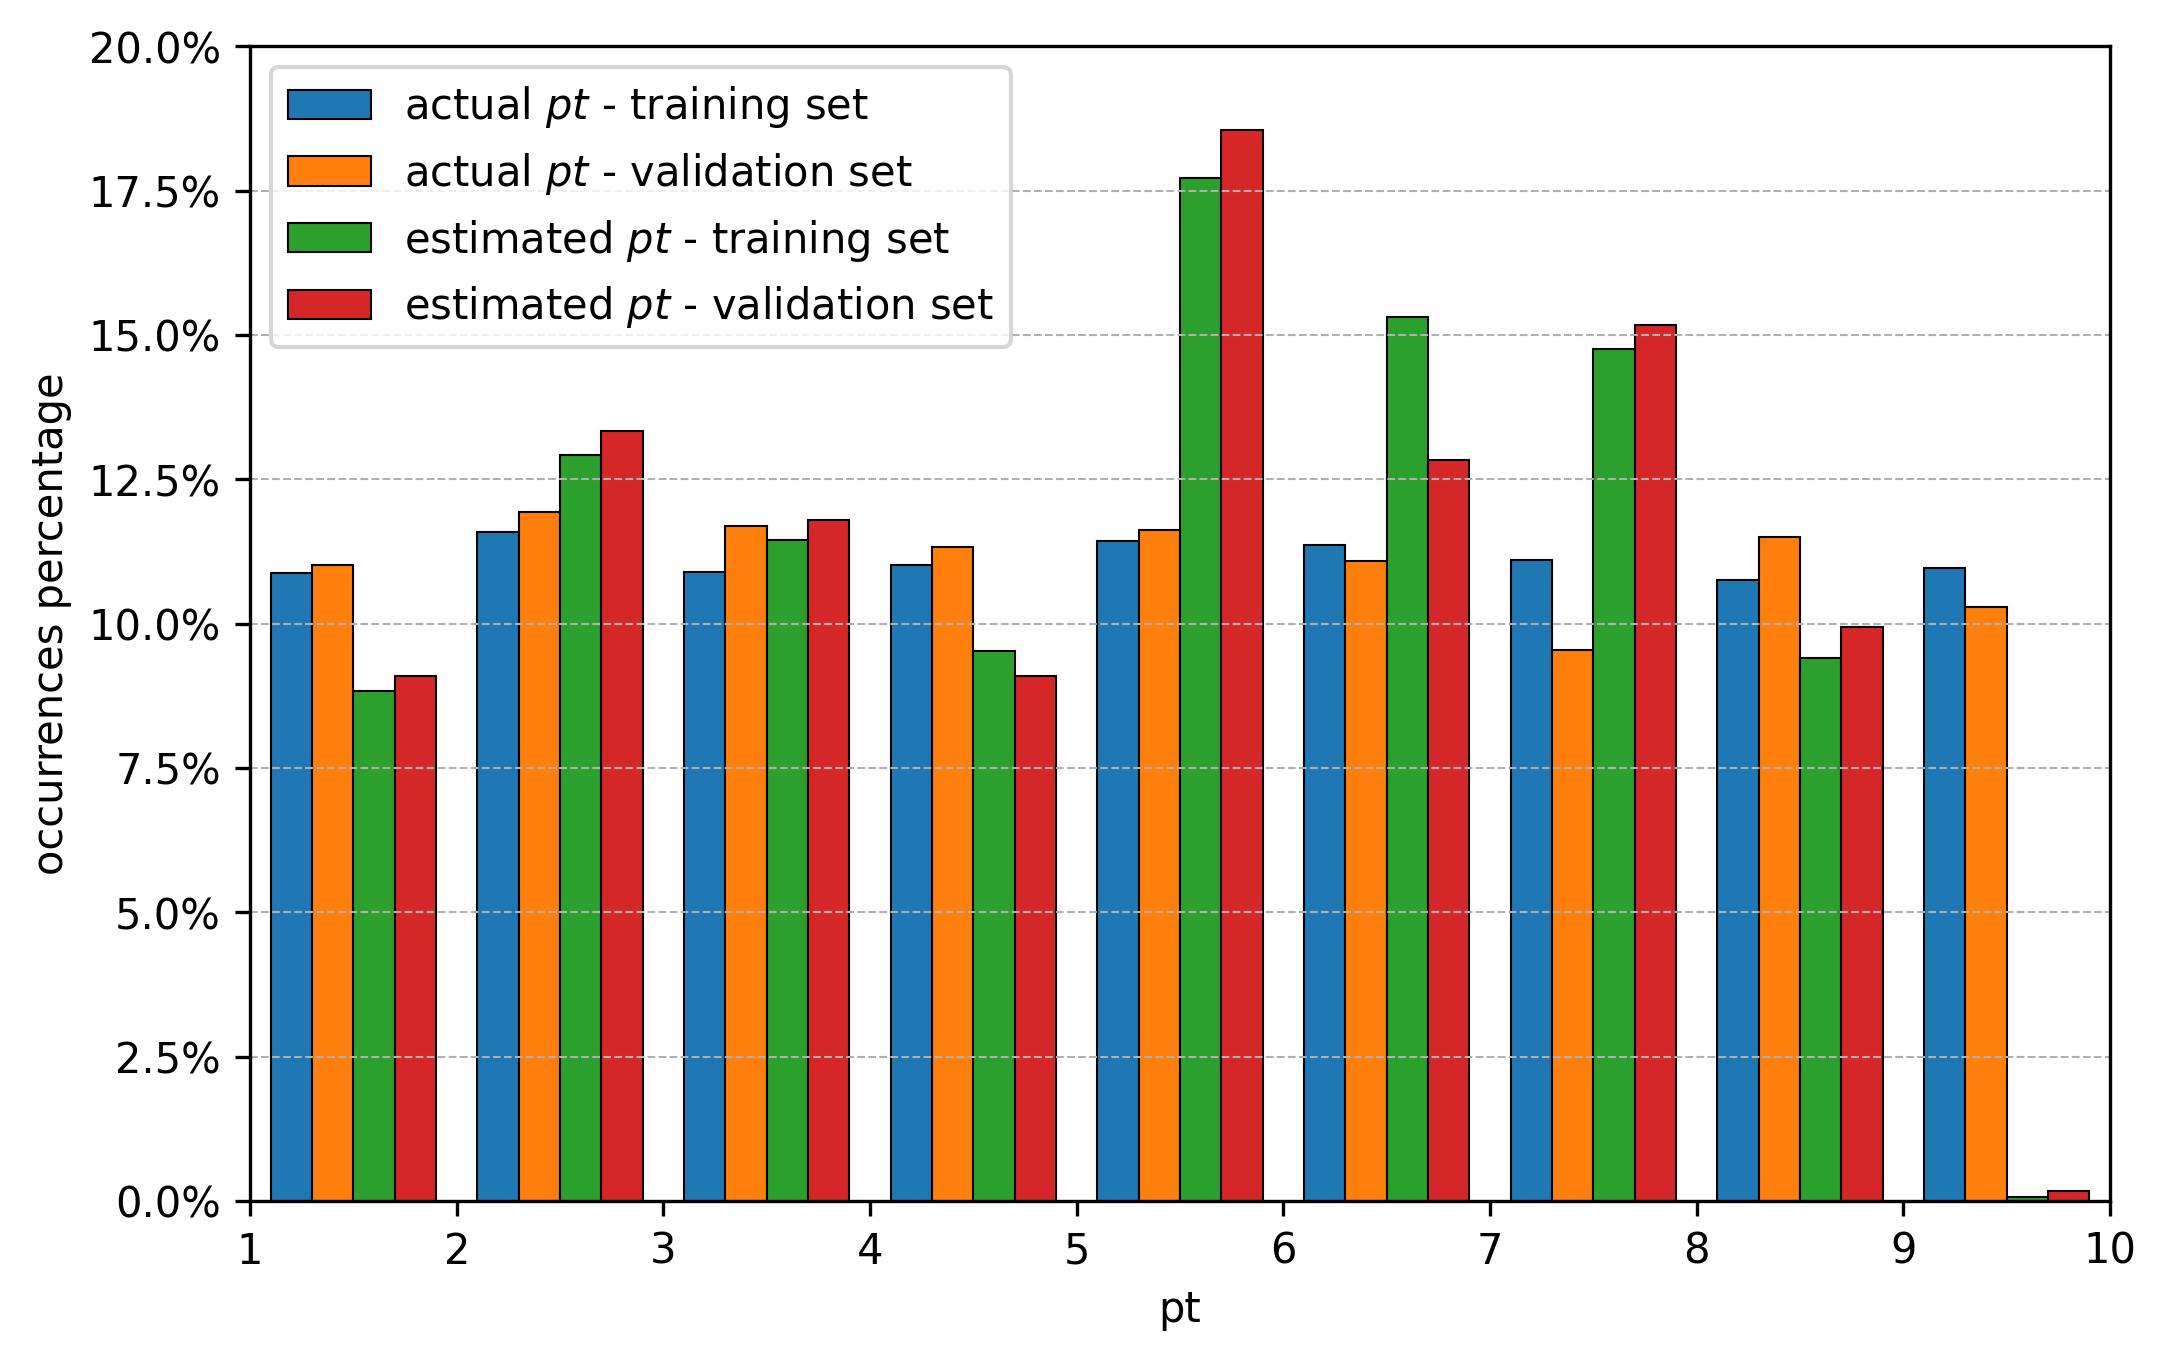

In [148]:
def plot_multiple_histograms(values, labels, xlabel=None, dpi=300):
    fig, ax = plt.subplots(figsize=[8,5])
    fig.set_dpi(dpi)

    containers = ax.hist(values, edgecolor = 'black', lw=0.5, histtype='bar', label=labels, density=True, bins=range(1,11))#np.ones((len(values), len(labels))) / len(values))
    print(containers)
    ax.yaxis.set_major_formatter(tick.PercentFormatter(1))
    ax.set_xlabel(xlabel)
    ax.set_ylabel('occurrences percentage')
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.legend(loc='upper left')
    ax.set_xlim((1,10))
    ax.set_ylim((0,0.20))
    plt.show()

import matplotlib.ticker as tick
import pandas as pd
plot_multiple_histograms(
    [train_set(pt).flatten(), validation_set(pt).flatten(), train_set(estimated_pt).flatten(), validation_set(estimated_pt).flatten()],
    [r'actual $pt$ - training set', r'actual $pt$ - validation set', r'estimated $pt$ - training set', r'estimated $pt$ - validation set'],
    'pt')

In [112]:
import matplotlib.ticker as tick

def plot_loss_by_parameter(loss, parameter, loss_label='', parameter_label='', statistic='mean', bins=25, color='#1f77b4', legend_loc='best', point_label='loss value', ylim=None, dpi=100):
    from scipy.stats import binned_statistic
    
    bin_means, bin_edges, bin_number = binned_statistic(parameter, loss, statistic=statistic, bins=bins)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2

    plt.figure(dpi=dpi)
    plt.plot(parameter, loss, '.', label=point_label, alpha=0.5, color=color)
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='black', lw=4, label=f'binned {statistic}')
    plt.xlabel(parameter_label)
    plt.ylabel(loss_label)
    plt.grid(linestyle='--', linewidth=0.5) # axis='y', 
    if ylim:
        plt.ylim(ylim)
    plt.gca().yaxis.set_major_formatter(tick.PercentFormatter())
    xmin, xmax, ymin, ymax = plt.axis()
    print('ylim:', ymin, ymax)
    plt.legend(loc=legend_loc)

102/256 [==========>...................] - ETA: 0s

256/256 [==============================] - 0s 481us/step
ylim: -24.61329620418562 516.9351140589375
ylim: 0.0 100.0
ylim: 0.0 100.0
ylim: 0.0 100.0


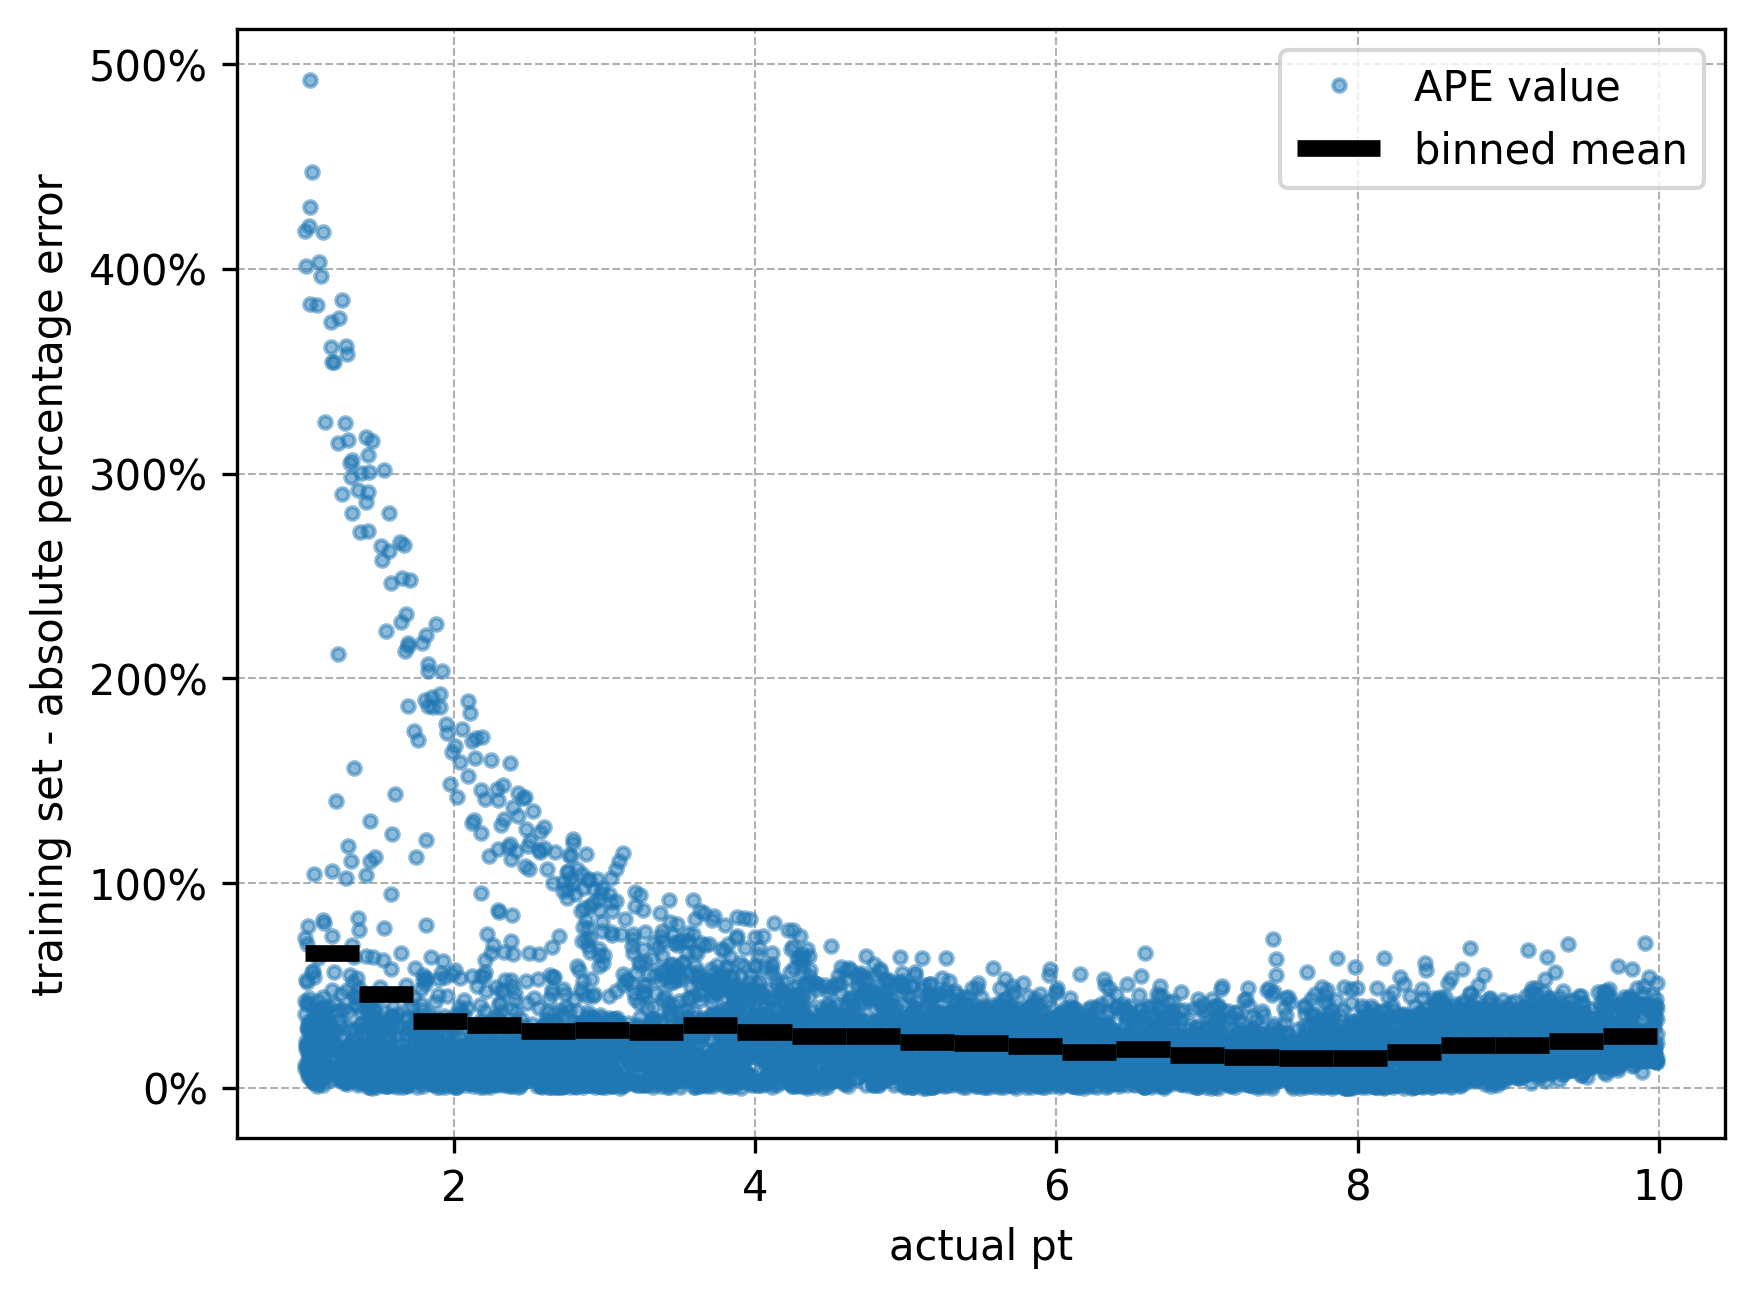

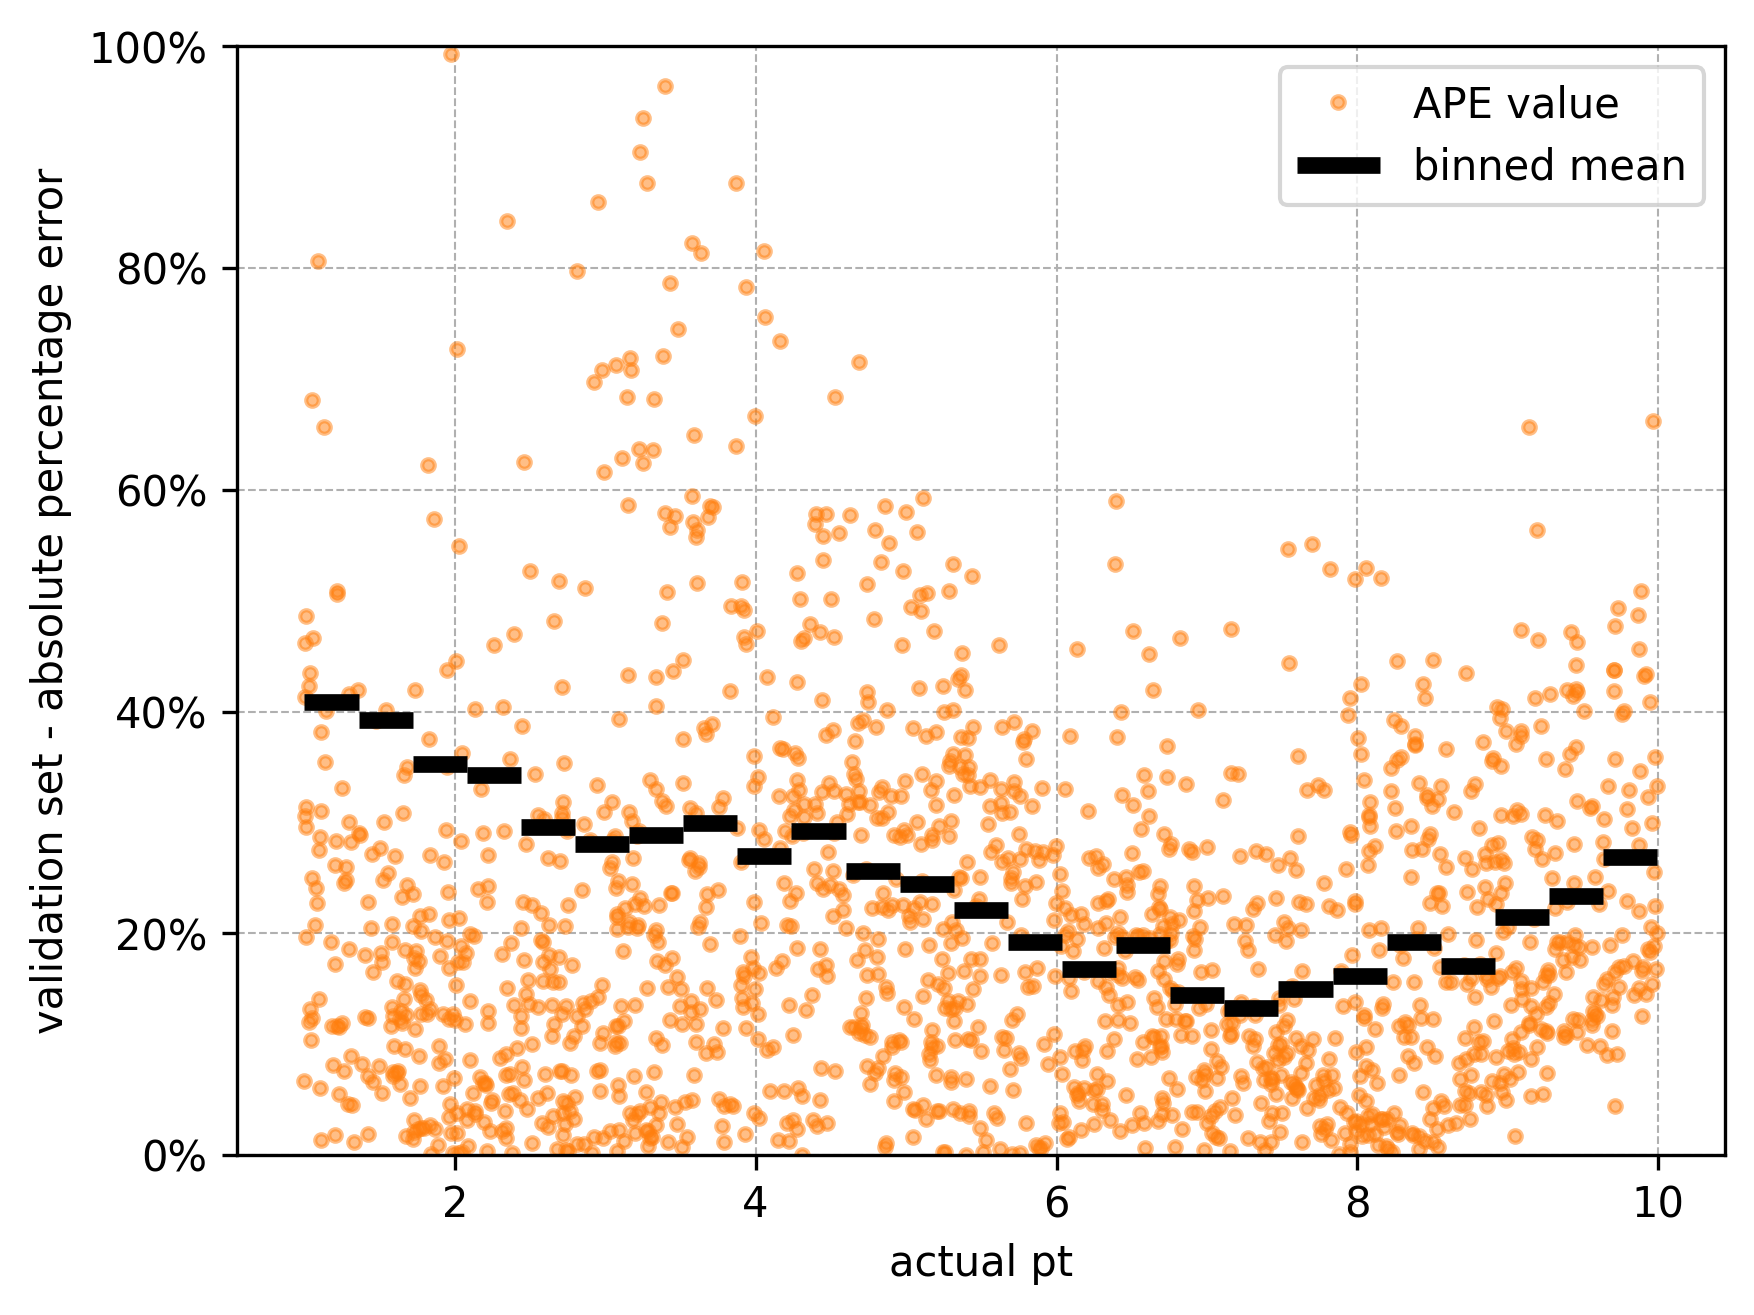

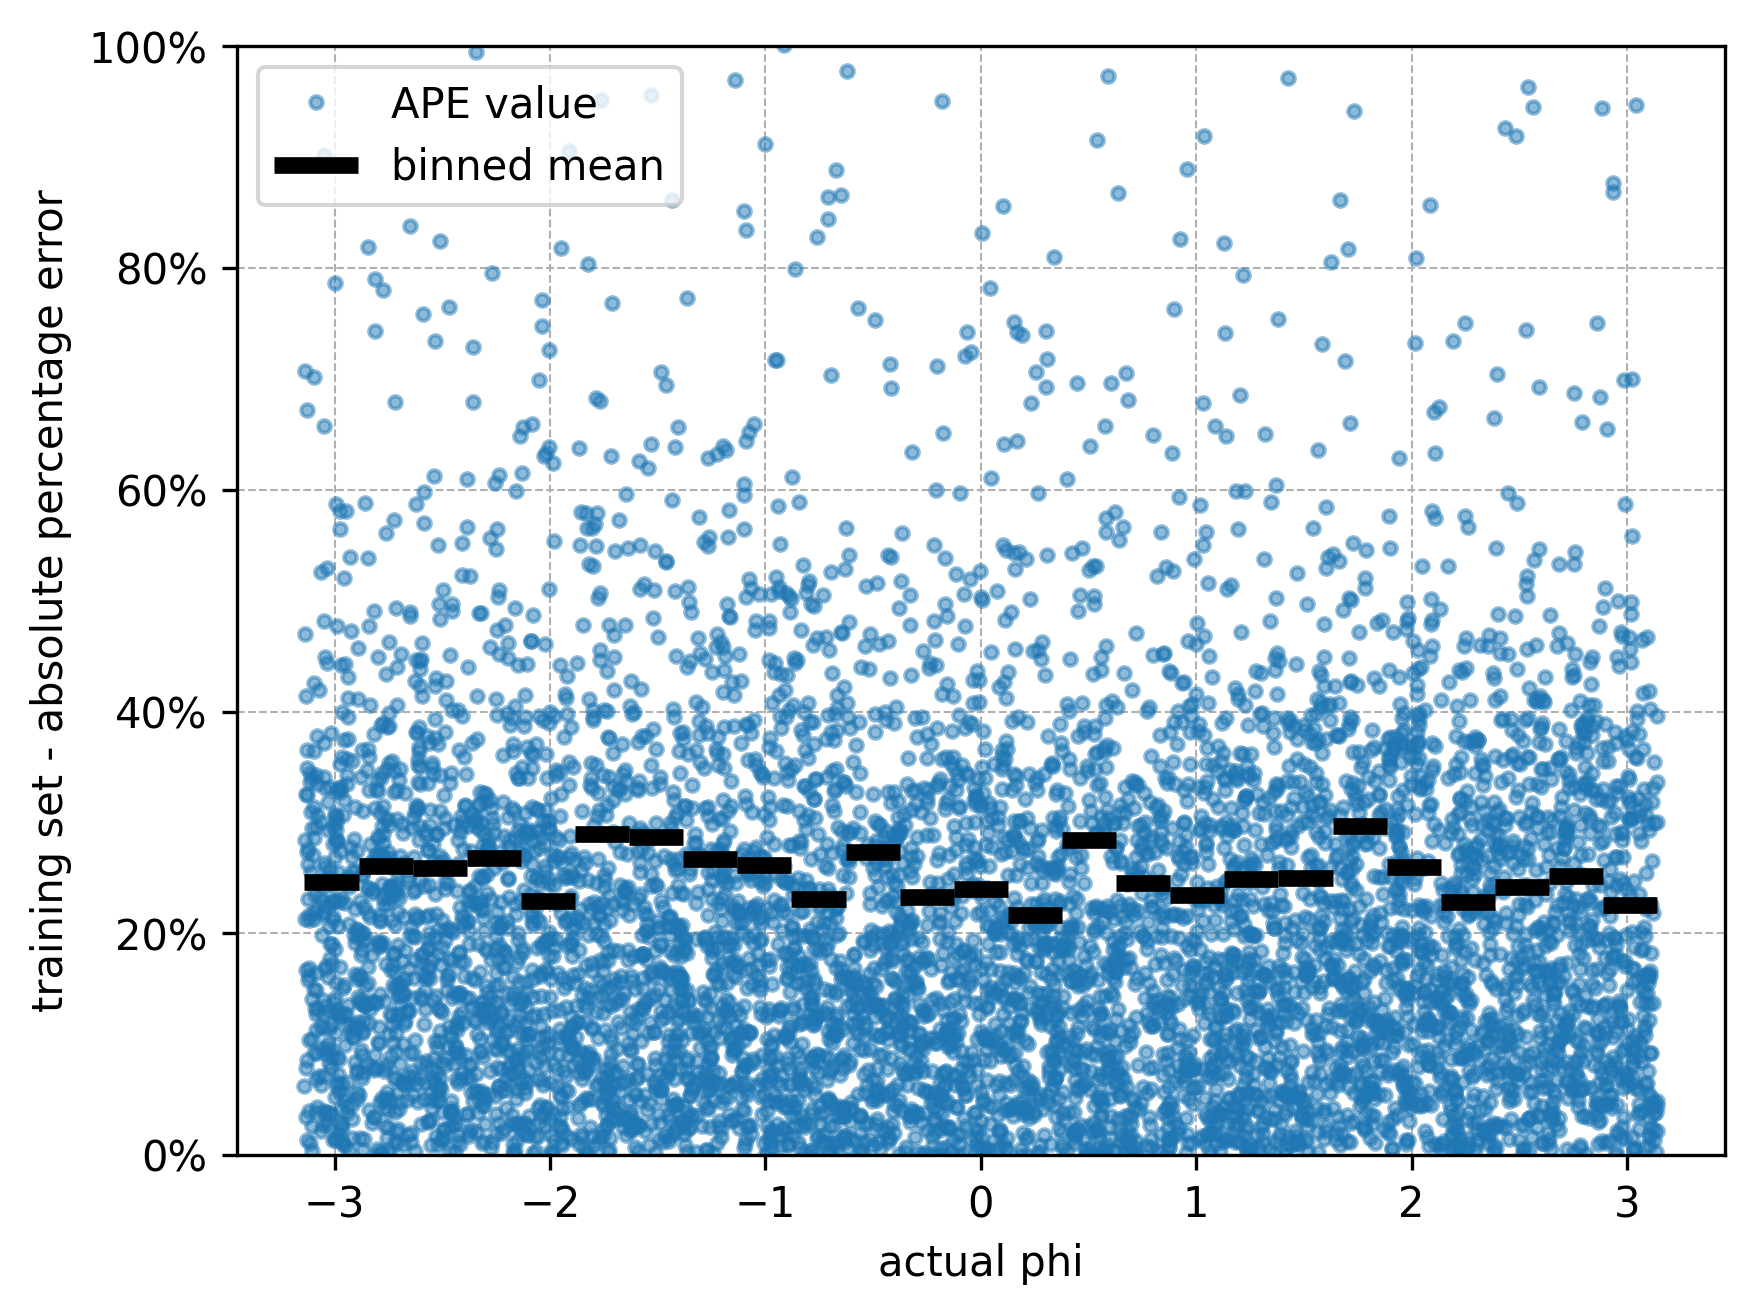

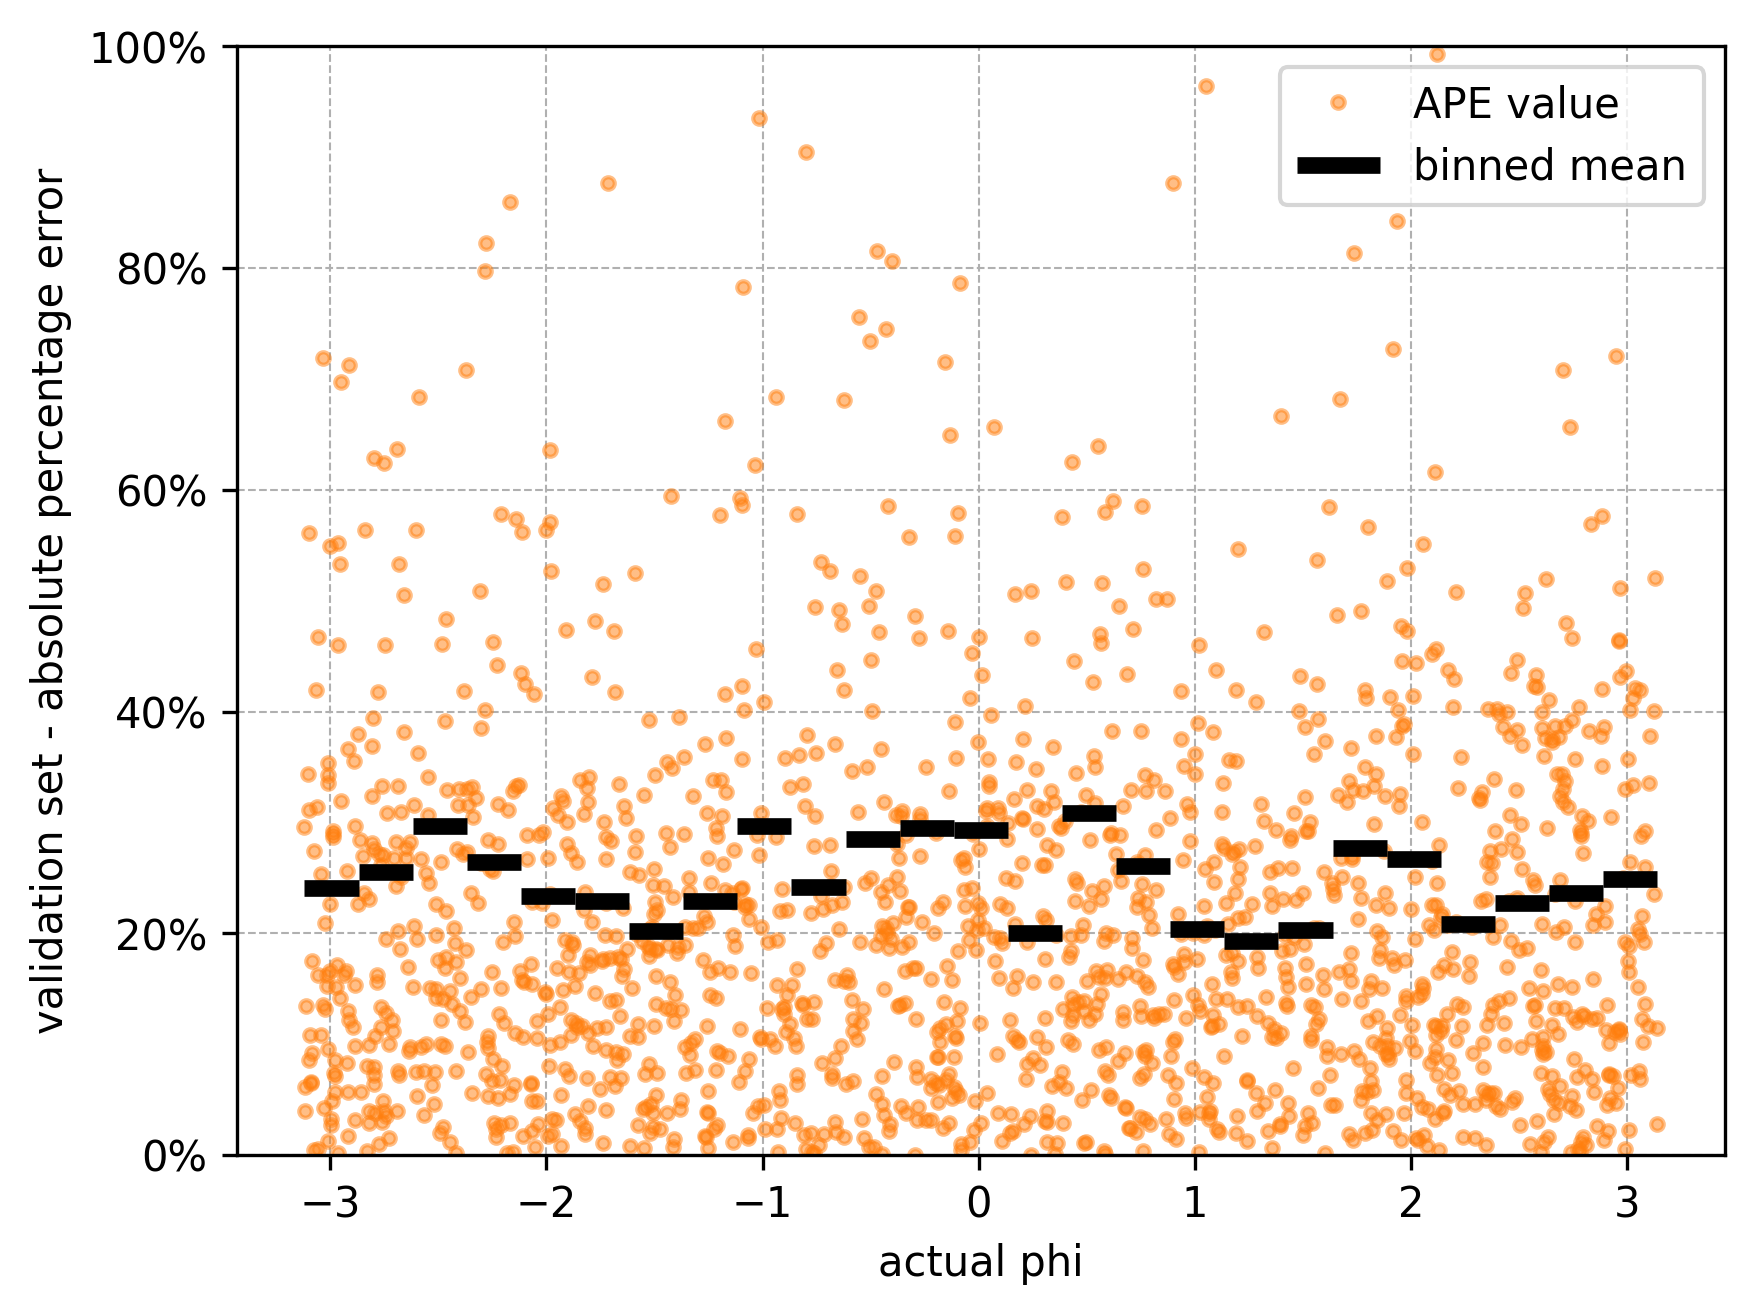

In [118]:
# from common.plot import plot_loss_by_parameter
from common.utils import validation_set, train_set

result = 100 * np.abs((pt[:, np.newaxis] - model.predict(points)).flatten()/pt)

plot_loss_by_parameter(loss=train_set(result), parameter=train_set(pt), 
                       loss_label='training set - absolute percentage error', parameter_label='actual pt', point_label='APE value',
                       statistic='mean', dpi=300, legend_loc='upper right')
plot_loss_by_parameter(loss=validation_set(result), parameter=validation_set(pt), 
                       loss_label='validation set - absolute percentage error', parameter_label='actual pt', point_label='APE value',
                       statistic='mean', dpi=300, legend_loc='upper right', color='#ff7f0e', ylim=(0,100))

phi = np.load('/host/dissertation/proccessed_data/phi.npy') 
plot_loss_by_parameter(loss=train_set(result), parameter=train_set(phi), 
                       loss_label='training set - absolute percentage error', parameter_label='actual phi', point_label='APE value',
                       statistic='mean', dpi=300, ylim=(0,100))
plot_loss_by_parameter(loss=validation_set(result), parameter=validation_set(phi), 
                       loss_label='validation set - absolute percentage error', parameter_label='actual phi', point_label='APE value',
                       statistic='mean', dpi=300, color='#ff7f0e', ylim=(0,100))

In [143]:
model.load_weights('/host/dissertation/trained_models/inv_pt_exxample_3x16-sigmoid_weights.h5')
estimated_pt = 1/model.predict(points)

108/256 [===========>..................] - ETA: 0s

256/256 [==============================] - 0s 472us/step


(array([[0.10879878, 0.1158378 , 0.1089518 , 0.11017598, 0.11430757,
        0.11369549, 0.11109411, 0.1075746 , 0.10956389],
       [0.11015912, 0.11933905, 0.11689106, 0.11321909, 0.11627907,
        0.11077111, 0.09547124, 0.11505508, 0.10281518],
       [0.08580755, 0.10586041, 0.15420488, 0.16088917, 0.14674335,
        0.15140681, 0.107104  , 0.06466656, 0.02331727],
       [0.08955224, 0.11753731, 0.1449005 , 0.15920398, 0.15671642,
        0.14614428, 0.11691542, 0.05410448, 0.01492537]]), array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), <a list of 4 BarContainer objects>)


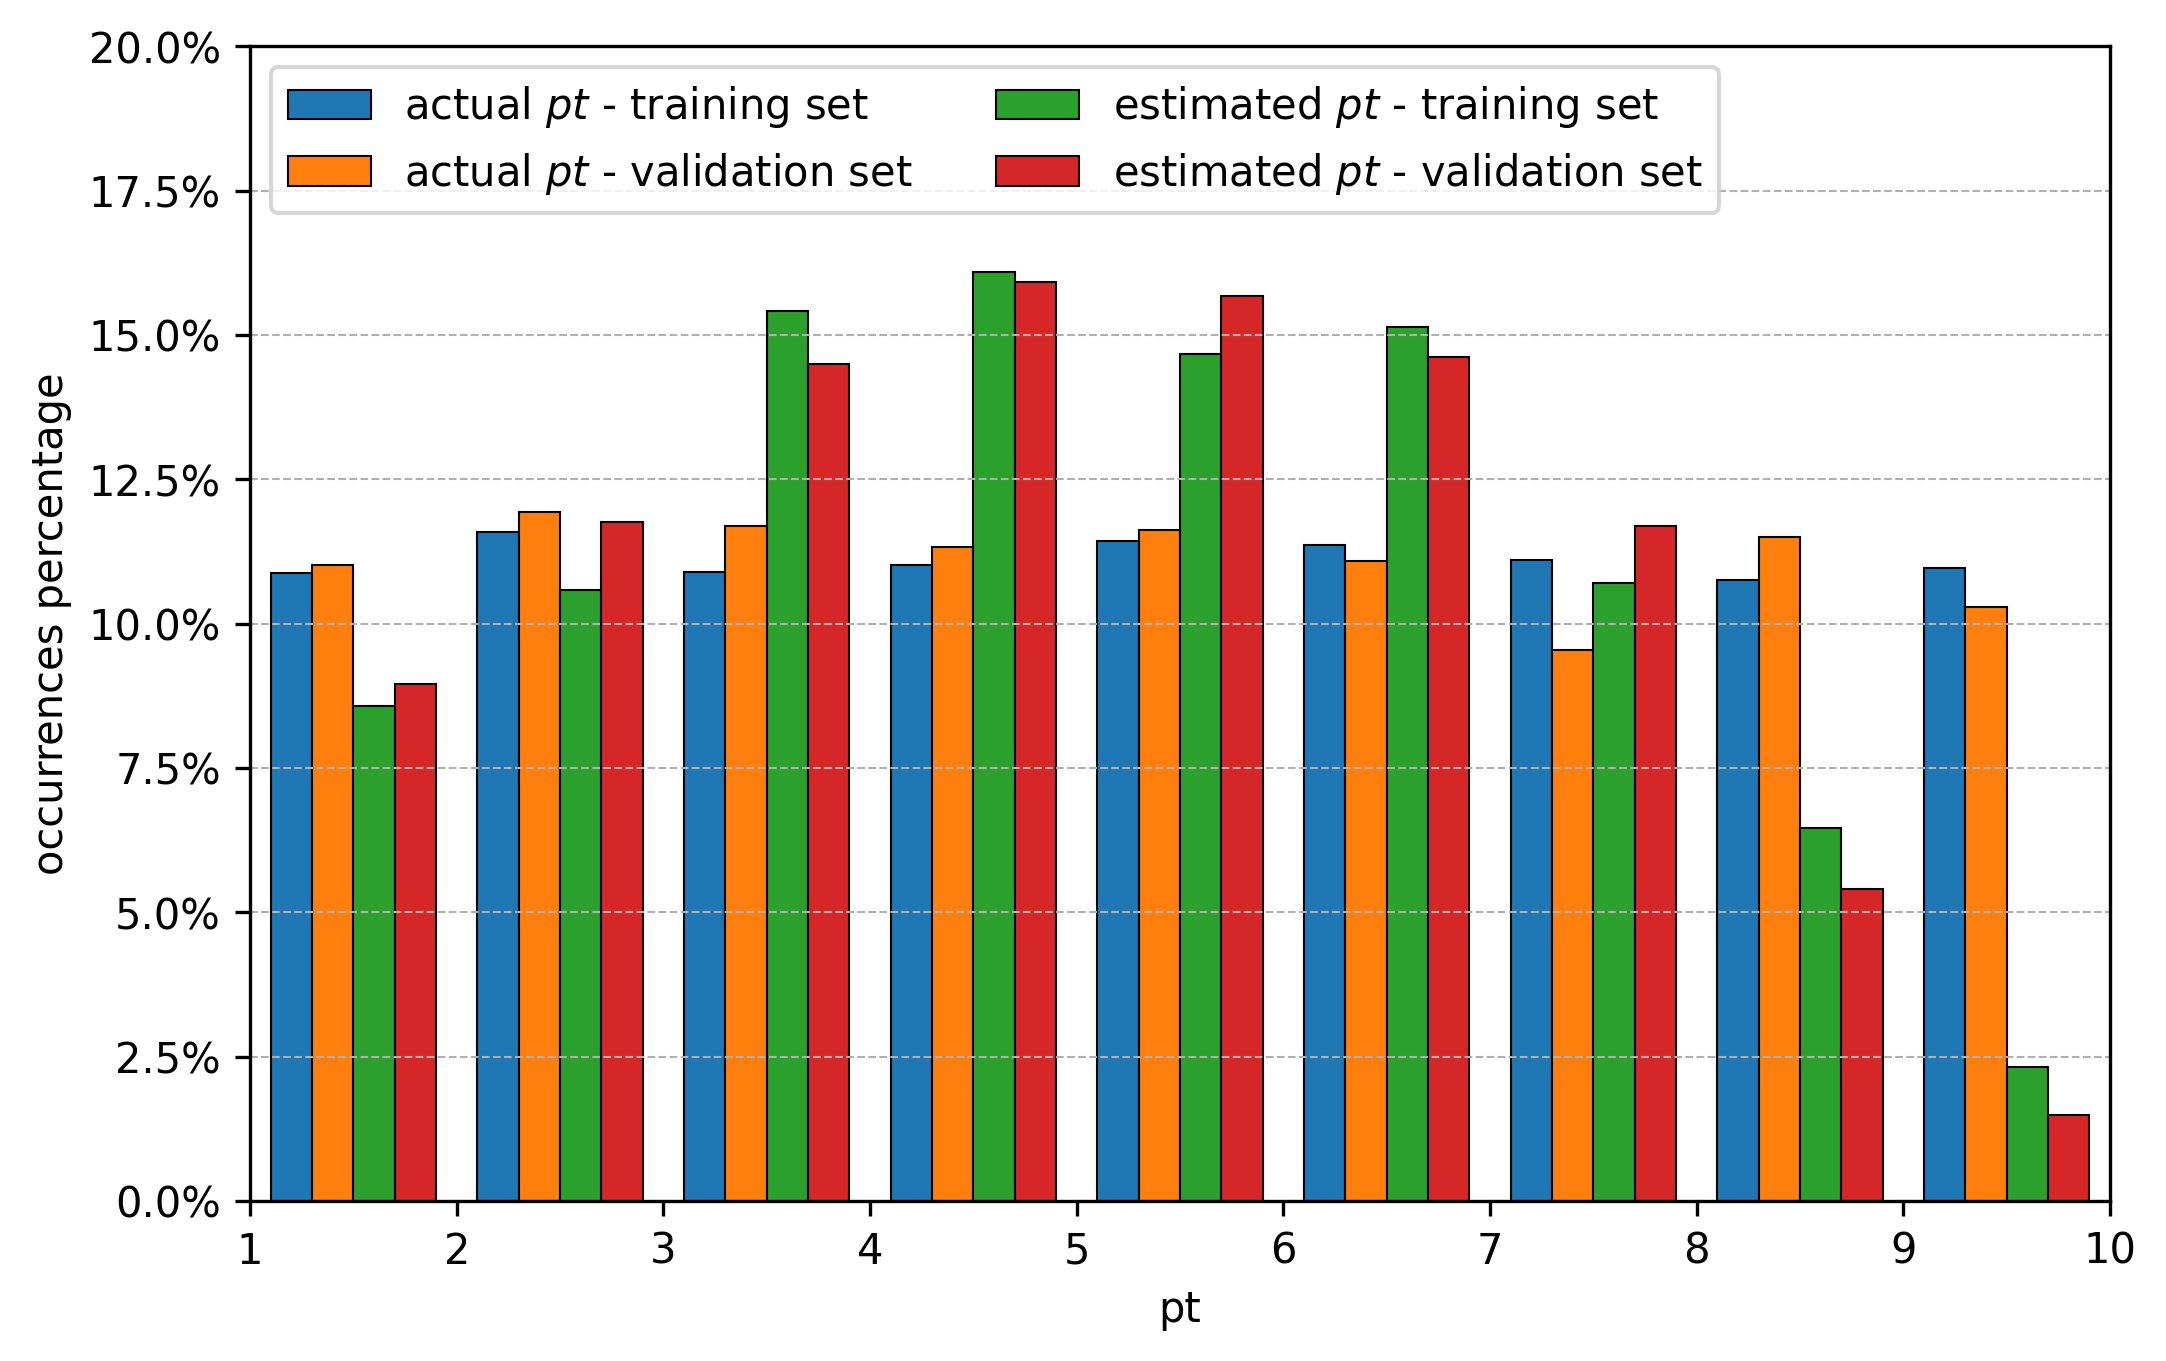

In [145]:
def plot_multiple_histograms(values, labels, xlabel=None, dpi=300):
    fig, ax = plt.subplots(figsize=[8,5])
    fig.set_dpi(dpi)

    containers = ax.hist(values, edgecolor = 'black', lw=0.5, histtype='bar', label=labels, density=True, bins=range(1,11))#np.ones((len(values), len(labels))) / len(values))
    print(containers)
    ax.yaxis.set_major_formatter(tick.PercentFormatter(1))
    ax.set_xlabel(xlabel)
    ax.set_ylabel('occurrences percentage')
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.legend(loc='upper left', ncols=2)
    ax.set_xlim((1,10))
    ax.set_ylim((0,0.20))
    plt.show()

import matplotlib.ticker as tick
import pandas as pd
plot_multiple_histograms(
    [train_set(pt).flatten(), validation_set(pt).flatten(), train_set(estimated_pt).flatten(), validation_set(estimated_pt).flatten()],
    [r'actual $pt$ - training set', r'actual $pt$ - validation set', r'estimated $pt$ - training set', r'estimated $pt$ - validation set'],
    'pt')

 97/256 [==========>...................] - ETA: 0s

256/256 [==============================] - 0s 498us/step
ylim: -17.618762432398896 370.02415340804754
ylim: 0.0 100.0
ylim: 0.0 100.0
ylim: 0.0 100.0


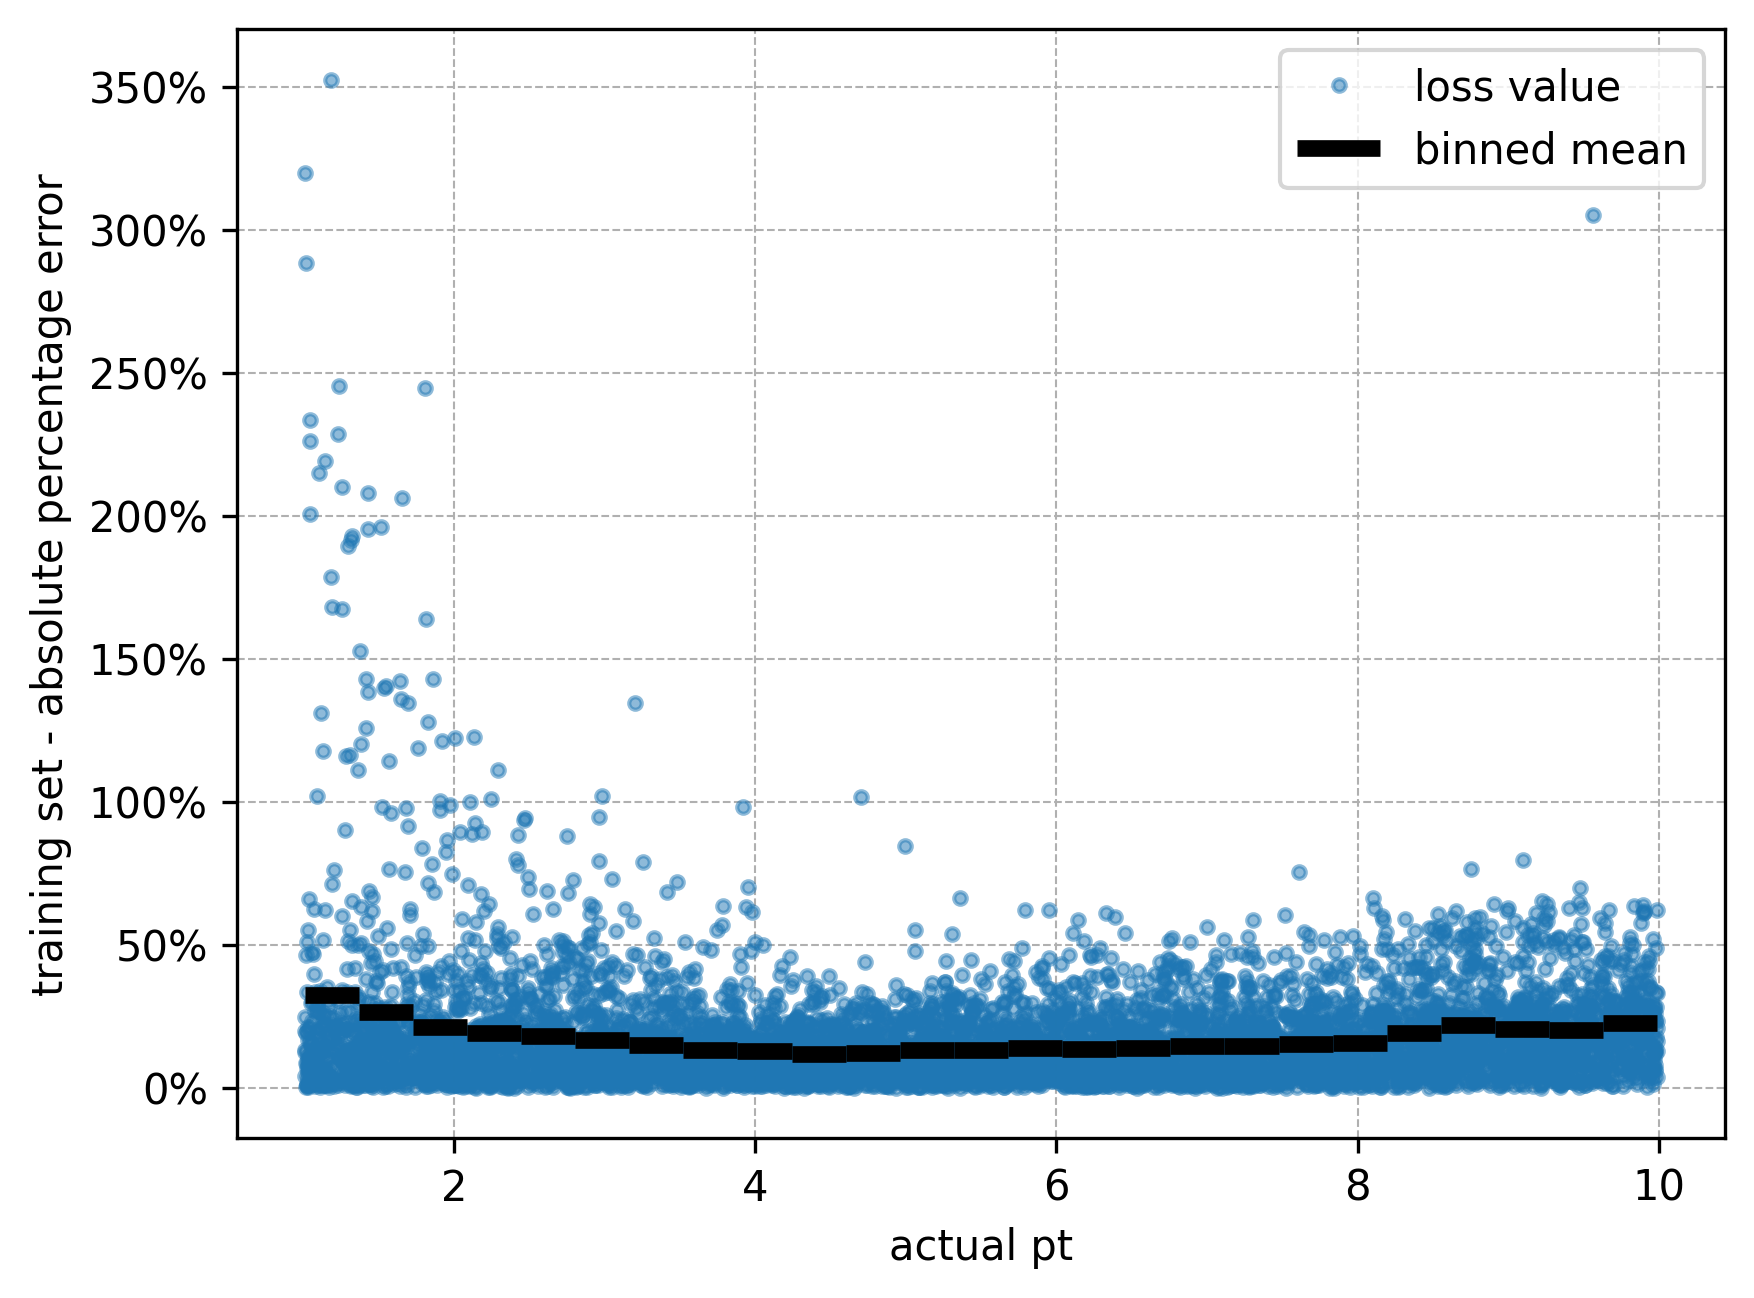

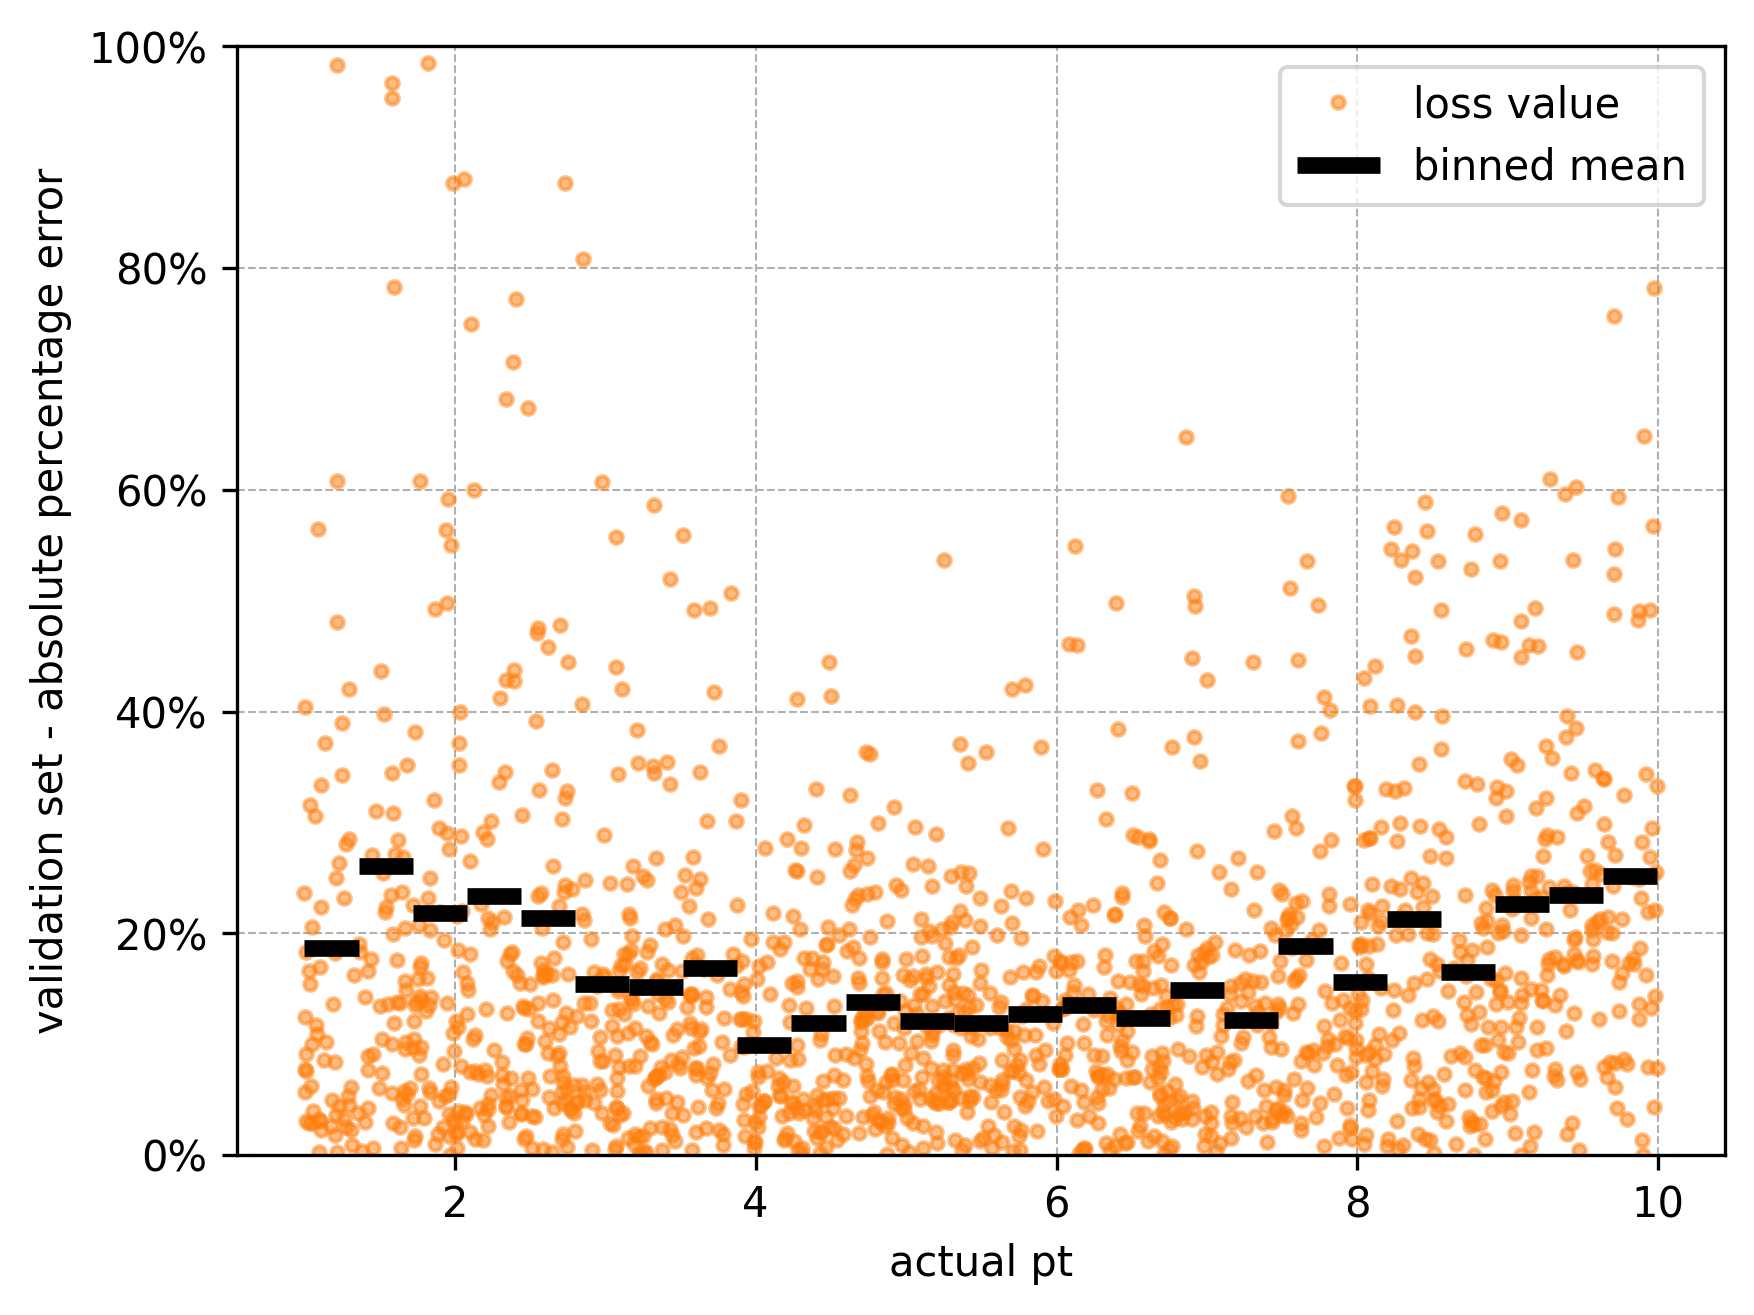

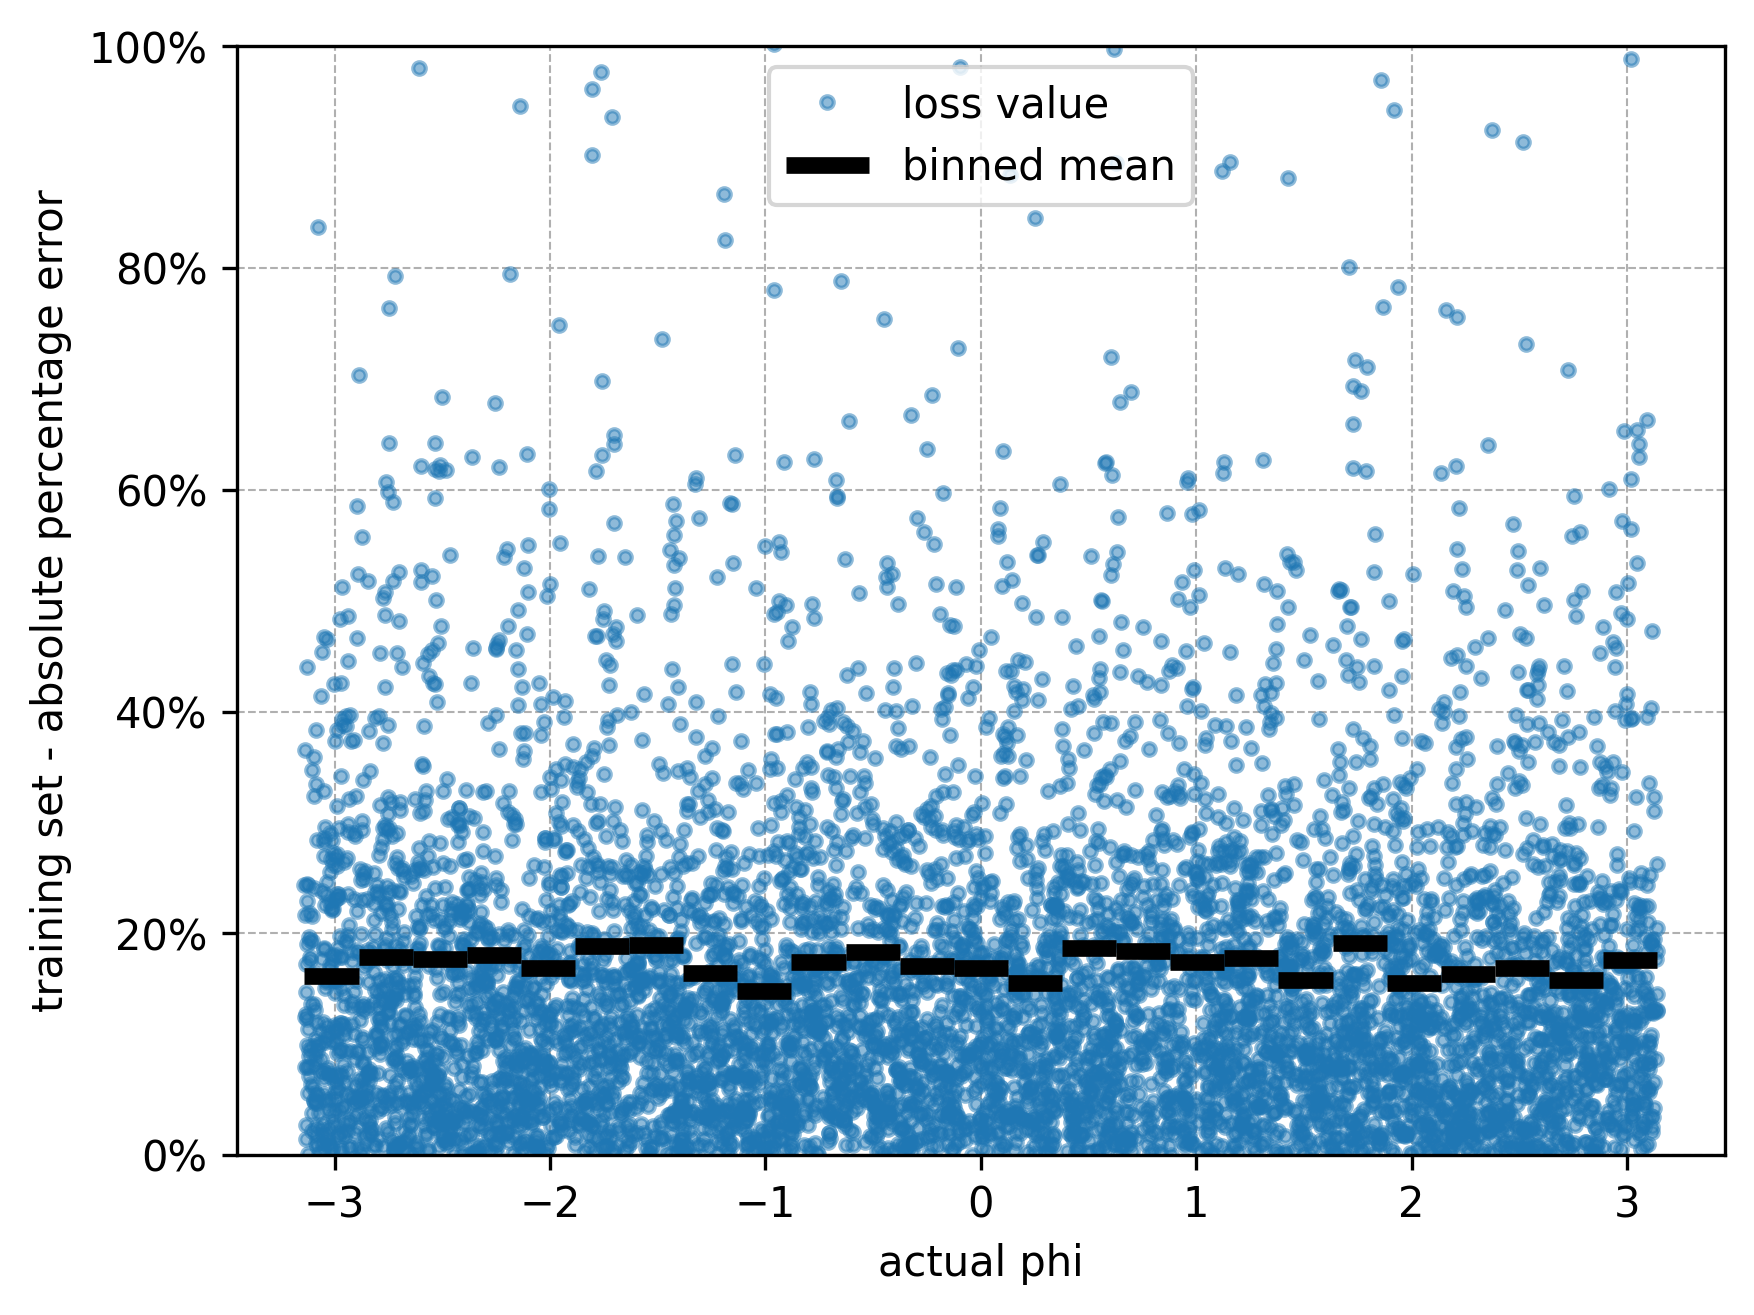

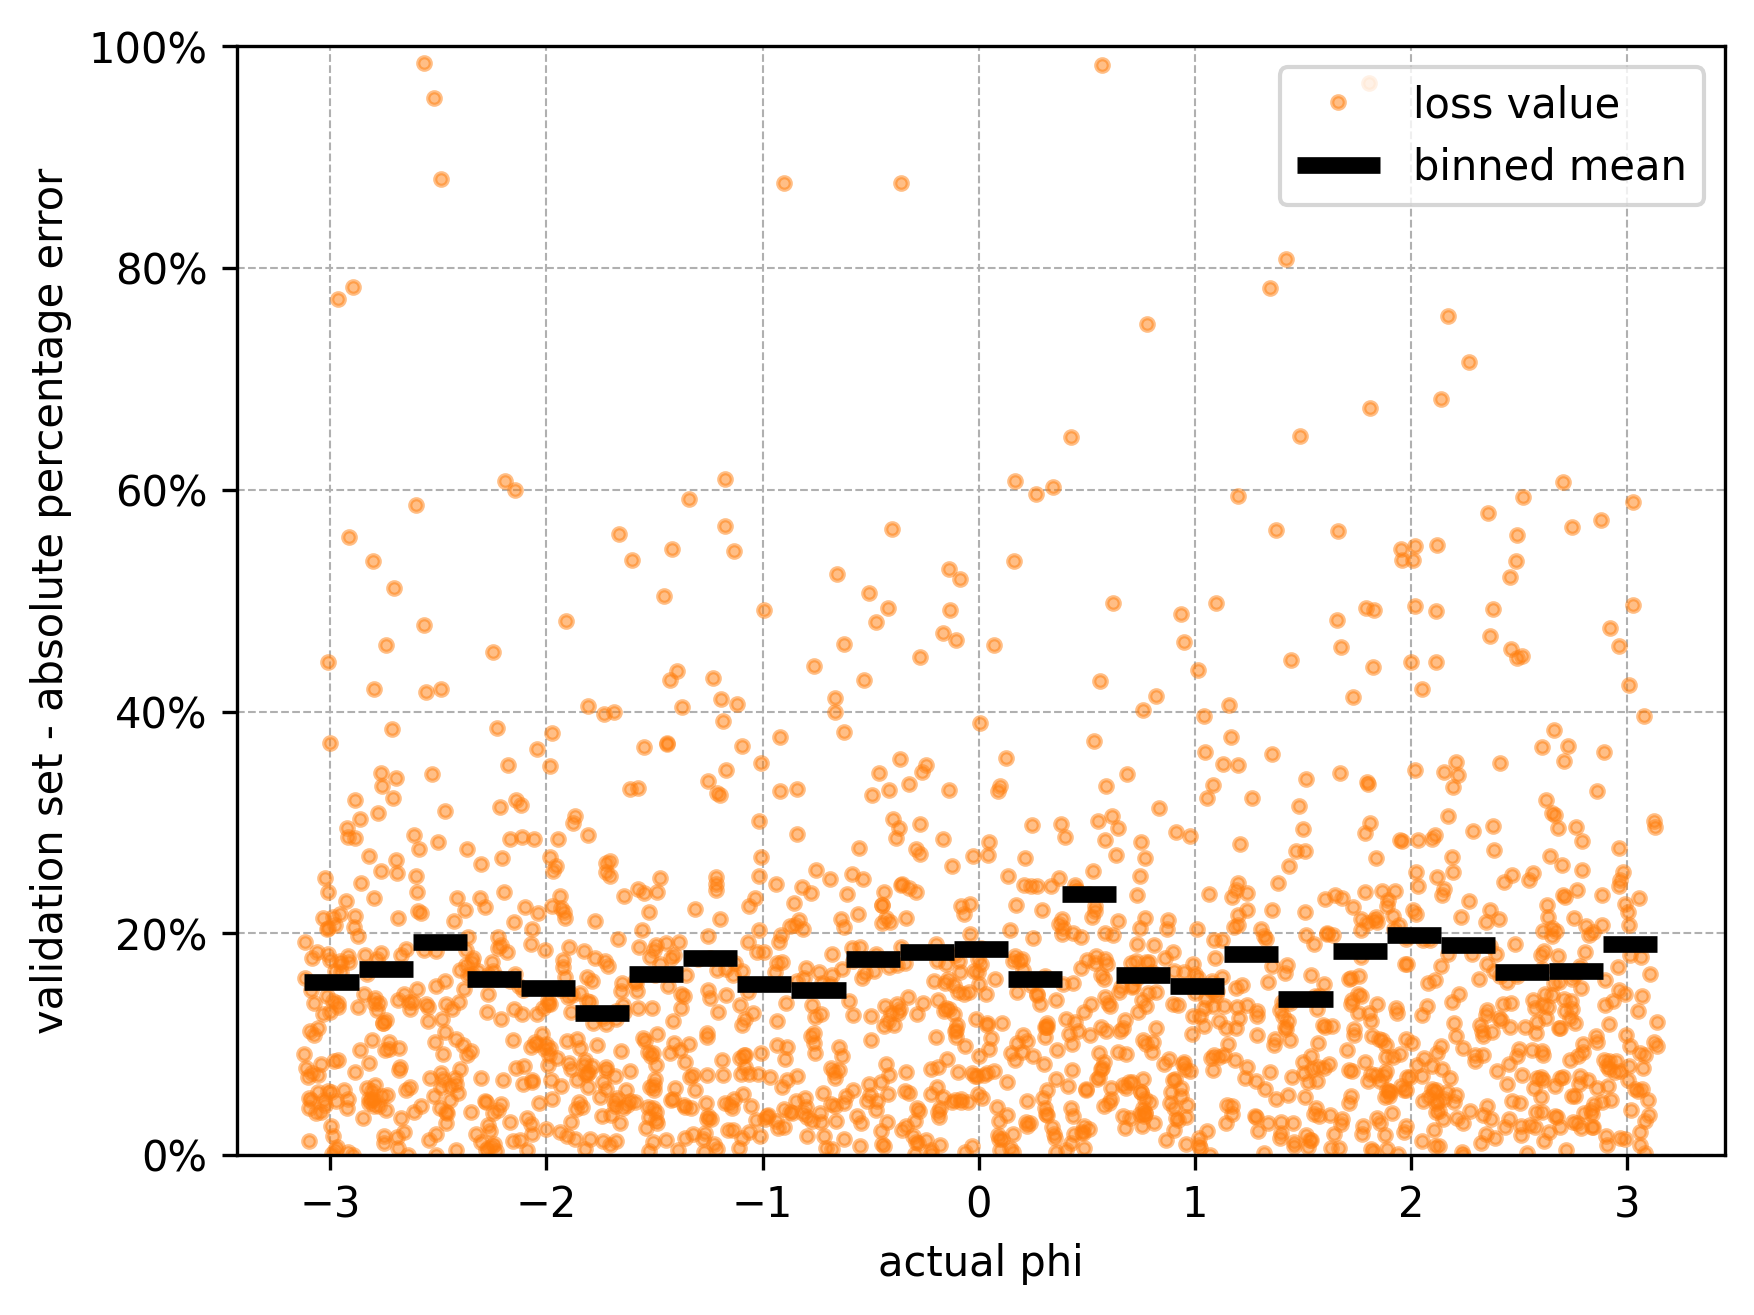

In [116]:
# from common.plot import plot_loss_by_parameter
from common.utils import validation_set, train_set

result = 100 * np.abs((pt[:, np.newaxis] - 1/model.predict(points)).flatten()/pt)

plot_loss_by_parameter(loss=train_set(result), parameter=train_set(pt), 
                       loss_label='training set - absolute percentage error', parameter_label='actual pt', 
                       statistic='mean', dpi=300, ylim=(0,100))
plot_loss_by_parameter(loss=validation_set(result), parameter=validation_set(pt), 
                       loss_label='validation set - absolute percentage error', parameter_label='actual pt', 
                       statistic='mean', dpi=300, color='#ff7f0e', ylim=(0,100))

phi = np.load('/host/dissertation/proccessed_data/phi.npy') 
plot_loss_by_parameter(loss=train_set(result), parameter=train_set(phi), 
                       loss_label='training set - absolute percentage error', parameter_label='actual phi', 
                       statistic='mean', dpi=300, ylim=(0,100))
plot_loss_by_parameter(loss=validation_set(result), parameter=validation_set(phi), 
                       loss_label='validation set - absolute percentage error', parameter_label='actual phi', 
                       statistic='mean', dpi=300, color='#ff7f0e', ylim=(0,100))